# STEP PROJECT PYTHON (Shatiernikov Dmytro)

## Task 1. База даних IKEA

In [180]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats

In [181]:
res = pd.read_csv('ikea.csv')

In [246]:
res.head(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,54.4,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,54.4,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,54.4,101.7,104.5
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
7,7,60155602,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,101.7,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
9,9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,54.4,101.7,104.5


In [183]:
writer = pd.ExcelWriter('ikea.xlsx')
res.to_excel(writer)
writer.save()

# Task 2. Дослідницький аналіз

### Подивимося загальну інформацію про завантажений DataFrame. Як бачимо, порожні значення є лише у 3-х колонках: depth, height, width.                           

In [9]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


### Заповнюємо порожні значення, чистимо дані у таблиці

#### Заповнюємо порожні значення середніми по колонці

In [184]:
res['depth'].fillna(np.mean(res['depth']), inplace = True)
res['height'].fillna(np.mean(res['height']), inplace = True)
res['width'].fillna(np.mean(res['width']), inplace = True)

#### Округляємо значення

In [185]:
res['depth'] = res['depth'].round(1)
res['height'] = res['height'].round(1)
res['width'] = res['width'].round(1)

#### замінюємо назви дизайнерів які мають "неправильну" назву (більше 10 слов у назві)

In [186]:
res.loc[(res['designer'].str.split().str.len() > 10), 'designer'] = 'Unknown designer'

#### Подивимось детальну інформацію по 4-х стовбчиках:

In [13]:
res[['price', 'depth', 'height','width']].describe()

,price,depth,height,width
count,3694.000000,3694.000000,3694.000000,3694.000000
mean,1078.208419,54.387439,101.685328,104.475501
std,1374.652494,23.279879,52.289927,65.214931
min,3.000000,1.000000,1.000000,1.000000
25%,180.900000,42.000000,74.000000,60.000000
50%,544.700000,54.400000,101.700000,90.000000
75%,1429.500000,54.400000,101.700000,120.000000
max,9585.000000,257.000000,700.000000,420.000000


### Побудуємо гістаграму

<AxesSubplot:>

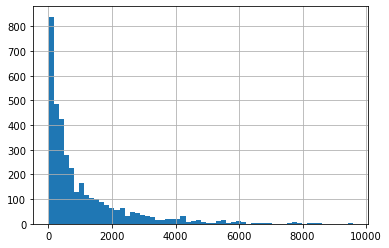

In [16]:
res['price'].hist(bins=60)

<AxesSubplot:>

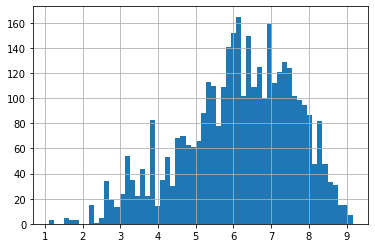

In [17]:
np.log(res['price']).hist(bins=60)

### Подивимося, чи залежить ціна від дизайнера

In [13]:
cnt1 = res.groupby(['designer'])['price'].mean()

In [14]:
cnt1.sort_values(ascending=False)

designer
Ola Wihlborg/IKEA of Sweden/Synnöve Mork            8551.000000
Ola Wihlborg/Synnöve Mork/IKEA of Sweden            8356.000000
Ehlén Johansson/Fredriksson/L Löwenhielm/Hilland    7988.000000
Henrik Preutz/IKEA of Sweden                        7149.500000
S Lanneskog/J Marnell/Ola Wihlborg                  6965.000000
                                                       ...     
S Edholm/L Ullenius                                   37.285714
H Preutz/A Fredriksson                                35.900000
Charlie Styrbjörn                                     35.000000
Annie Huldén                                          27.500000
Lisel Garsveden                                       16.200000
Name: price, Length: 283, dtype: float64

### Подивимося, чи є залежність ціни виробу від його розмірів:

In [19]:
res['volume'] = res['depth']*res['height']*res['width'] #порахуємо умовний об'єм вироба

#### Побудуємо scatter графік залежності розмірів вироба та його ціни:

In [20]:
x = np.array(res['price'])
y = np.array(res['volume'])

(0.0, 1500.0)

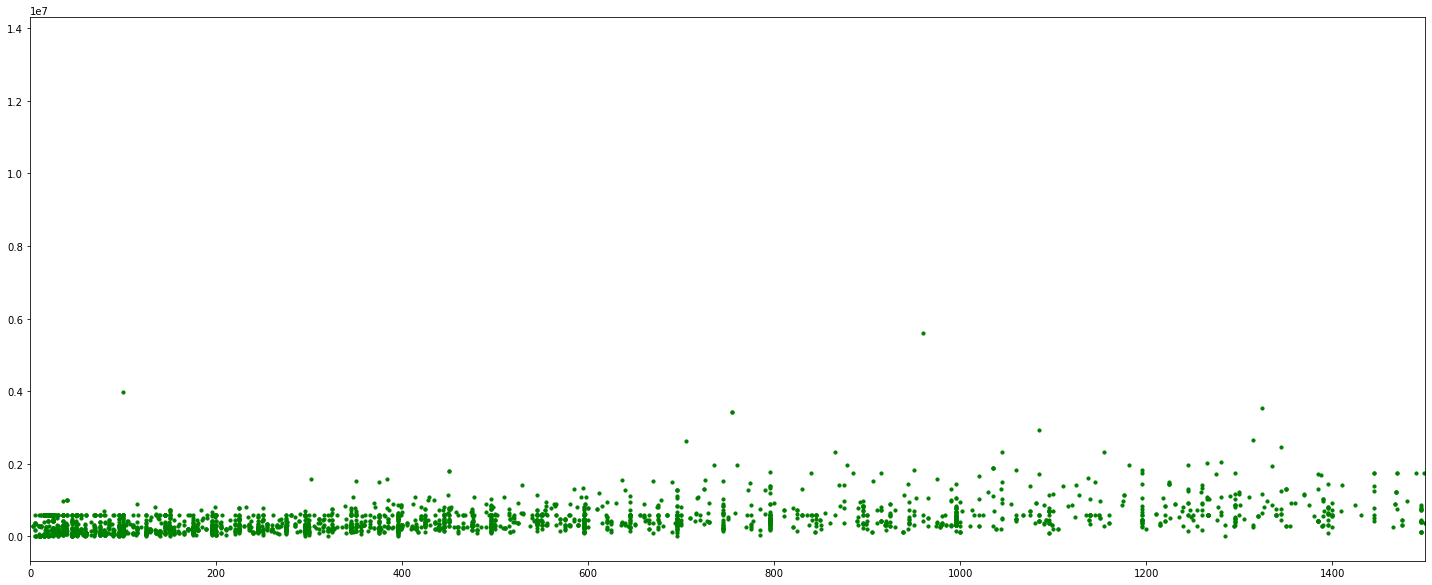

In [21]:
f, ax = plt.subplots(figsize=(25, 10))
ax.scatter(x,y, s=10, c='g')
ax.set_xlim([0, 1500])
#ax.set_ylim([0.00, 0.40])

### Порахуємо коефіцієнт кореляції цих 2-х параметрів:

In [22]:
cor = res[['price', 'volume']]

In [23]:
cor.corr()

,price,volume
price,1.000000,0.679912
volume,0.679912,1.000000


### Як видно з графіка і розрахунків, бачимо певну залежність ціни від розмірів (об'єму) продукції (коефіцієнт кореляції = 0,679912)

### Порахуємо, скільки виробів у кожній категорії:

In [86]:
cnt2 = res['category'].value_counts()

In [87]:
cnt2

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

### Побудуємо pie chart по категоріям

In [100]:
x = np.array(cnt2.index)
y = np.array(cnt2)

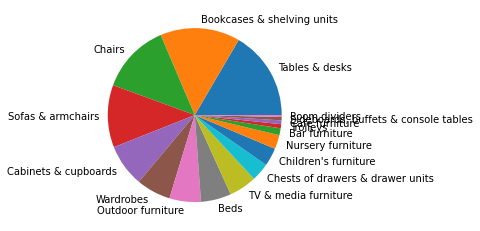

In [101]:
plt.pie(y, labels = x)
plt.show()

### Як видно з розрахунків та графіка більше 50% усієї продукції складає 4 категорії: ables & desks, Bookcases & shelving units, Chairs та Sofas & armchairs

### Подивимося, вироби яких дизайнерів представлені найбільше:

In [92]:
cnt3 = res['designer'].value_counts()

In [95]:
cnt3[0:20]

IKEA of Sweden                    828
Ehlén Johansson                   161
Francis Cayouette                 151
Unknown designer                  140
Ola Wihlborg                      134
K Hagberg/M Hagberg               122
Jon Karlsson                      120
Ehlén Johansson/IKEA of Sweden     75
Carina Bengs                       75
Henrik Preutz                      70
IKEA of Sweden/Ehlén Johansson     70
Studio Copenhagen                  64
H Preutz/A Fredriksson             60
Ebba Strandmark                    57
K Malmvall/E Lilja Löwenhielm      55
Nike Karlsson                      53
Eva Lilja Löwenhielm               46
Johan Kroon                        31
Tord Björklund                     31
Carl Öjerstam                      28
Name: designer, dtype: int64

### Побудуємо pie chart по дизайнерам

In [102]:
x = np.array(cnt3.index)
y = np.array(cnt3)

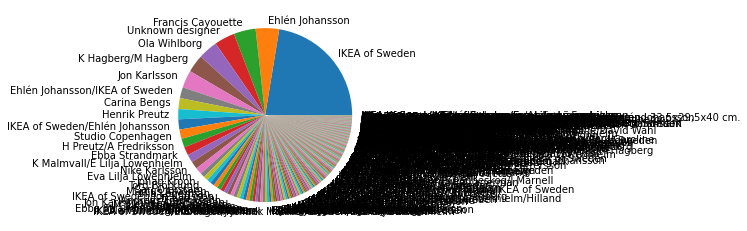

In [103]:
plt.pie(y, labels = x)
plt.show()

### Висновок: дизайн майже чверті усієї продукції був розроблений співробітниками (дизайнерами) компанії IKEA

### Подивимося, скільки товарів продаються онлайн із загального асортименту

In [111]:
cnt4 = res['sellable_online'].value_counts()

In [112]:
cnt4

True     3666
False      28
Name: sellable_online, dtype: int64

### Висновок: майже весь асортимент IKEA можна купити онлайн

### Вирахуємо середню ціну за категоріями

In [118]:
cnt5 = res.groupby(['category'])['price'].mean()
cnt5 = cnt5.sort_values(ascending=False)
cnt5

category
Wardrobes                               2162.141949
Sofas & armchairs                       2004.016355
Beds                                    1647.432692
Tables & desks                          1129.395425
Sideboards, buffets & console tables    1068.086957
Chairs                                  1048.932640
Room dividers                            932.000000
Outdoor furniture                        859.826852
Cabinets & cupboards                     789.015753
Bar furniture                            679.553191
Trolleys                                 678.517857
TV & media furniture                     659.050526
Chests of drawers & drawer units         612.180000
Café furniture                           553.884615
Bookcases & shelving units               519.416058
Nursery furniture                        393.659794
Children's furniture                     272.758065
Name: price, dtype: float64

### Побудуємо bar chart середня ціна/категорії

In [119]:
x5 = np.array(cnt5.index)
y5 = np.array(cnt5)

<BarContainer object of 17 artists>

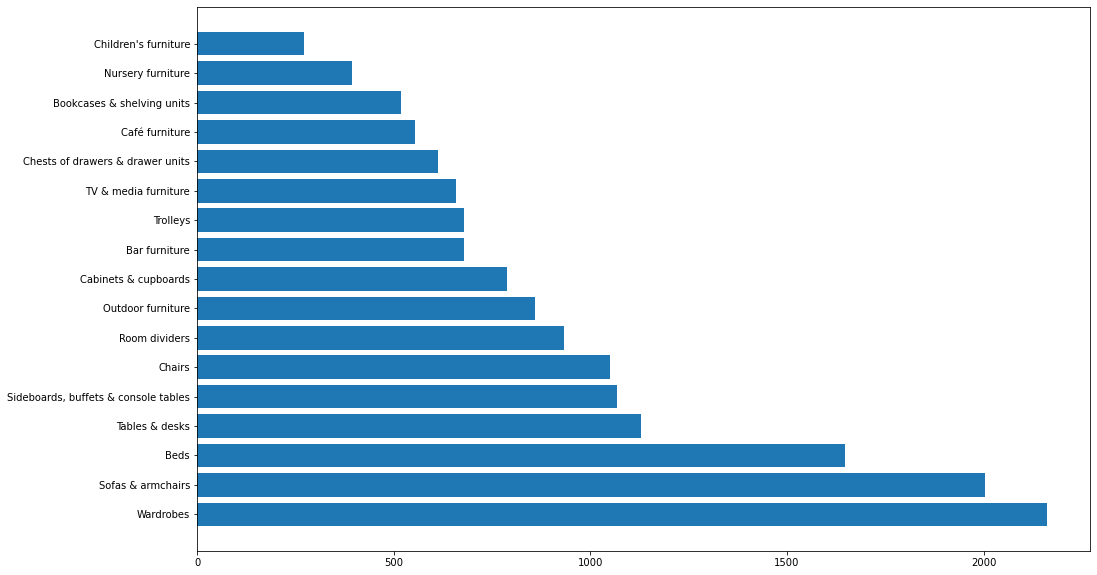

In [120]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10) 
ax.set(xlabel='')
ax.barh(x5, y5)

### Як видно, є явно виражена залежність категорії та ціни на продукцію

# Task 3 Статистика. Гіпотези

### Гіпотези:
### Основна гіпотеза Н0 (нульова гіпотеза) - Ціни на вироби дизайнерів IKEA of Sweden знаходяться на середньому рівні
### Альтернативна гіпотеза Н1 - Ціни на вироби дизайнерів IKEA of Sweden відрізняються від середніх по всьому асортименту


Для прийняття нульової гіпотези (або її спростування) використовуватимемо Z-тест.
Z-тест підходить для ситуацій, коли сукупність не обов'язково повинна бути розподілена нормально (у нашому випадку експоненційний розподіл),
дисперсія генеральної сукупності відома, а розмір вибірки великий (> = 30)

Для візуалізації збудуємо гістограму генеральної сукупності

<AxesSubplot:>

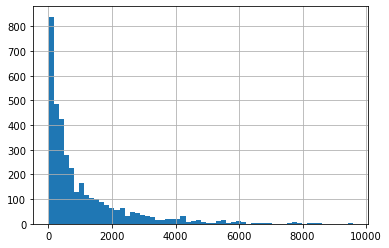

In [70]:
res['price'].hist(bins=60)

Бачимо експоненційний розподіл. Так само по гістограмі видно "викиди", але в даному аналізі ми не будемо їх враховувати (прибирати)

In [ ]:
# вибираємо рівень значимості дорівнює 0,05 (5%)

In [2]:
# Обчислимо середню генеральної сукупність та стандартне відхилення:

In [232]:
mean = res['price'].mean()
std = np.std(res['price'])

In [243]:
print('Середнє генеральної сукупності:', mean)
print('Стандартне відхилення:', std)

Середнє генеральної сукупності: 1078.2084190579315
Стандартне відхилення: 1374.466415978972


In [12]:
# Обчислимо середнє для нашої вибірки та стандартне відхилення:

In [238]:
sample_mean = res.groupby(['designer'])['price'].mean()
sample_mean = sample_mean.loc['IKEA of Sweden']

In [239]:
print('Середнє по виборці:', sample_mean)

Середнє по виборці: 522.473188405797


In [240]:
sample = res[res.designer == 'IKEA of Sweden']
sample = sample['price']
se = std/np.sqrt(len(sample))

In [242]:
print('Стандартне відхилення по виборці:', se)

Стандартне відхилення по виборці: 47.76600989483049


In [61]:
Z = (sample_mean-mean) / se
# Обчислити значення Z за формулою (Z-число стандартних відхилень від середнього значення точки даних)

In [62]:
Z

-11.634533256508814

In [64]:
P = 2 * stats.norm.sf (abs (Z)) # Використовуємо вбудований метод статистики для розрахунку значення P (значення ймовірності)

In [65]:
P

2.750907721745174e-31

### Як бачимо, Р значно менше обраного нами рівня значимості (0,05). В даному випадку ми відхиляємо нульову гіпотезу та приймаємо за основу альтернативну. Так само, ми бачимо негативний Z, це говорить про те, що середня ціна виробів дизайнерів IKEA of Sweden менша за середню ціну всього асортименту

# Task 4. Машинне навчання

### Грунтуючись на аналізі з Task 2 можемо стверджувати про залежність габаритів виробів та його ціни. Тому Формуємо Data Frame з тими стовпцями, які братимуть участь у навчанні.

In [187]:
res_learn = res[['price', 'depth', 'height', 'width']]

In [188]:
res_learn

,price,depth,height,width
0,265.0,54.4,99.0,51.0
1,995.0,54.4,105.0,80.0
2,2095.0,54.4,101.7,104.5
3,69.0,50.0,100.0,60.0
4,225.0,60.0,43.0,74.0
...,...,...,...,...
3689,750.0,50.0,101.7,91.0
3690,1572.0,50.0,101.7,135.0
3691,924.0,50.0,101.7,175.0
3692,2745.0,50.0,101.7,178.0


In [36]:
res_learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3694 non-null   float64
 1   depth   3694 non-null   float64
 2   height  3694 non-null   float64
 3   width   3694 non-null   float64
dtypes: float64(4)
memory usage: 115.6 KB


In [189]:
X = res_learn[['depth', 'height', 'width']] # ознаки
y = res_learn['price'] # цільова змінна

### розділимо дані за допомогою Scikit-Learn train_test_split:

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

### Будемо користуватися класом лінійної регресії, так як у дослідницькому аналізі, який проводився вище, ми побачили лінійну залежність ціни від розмірів виробу

In [199]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [200]:
lr = lr.fit(X_train,y_train)

In [201]:
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на тестовом наборе: 0.49


### Як бачимо, модель передбачає ціну, але не дуже точно. Гадаю, це пов'язано з тим, що при заповненні пустих значень в колонках з розмірами брались середні по колонці та враховувались лише розміри товарів

### Заповнимо пусті значення розмірів середніми значеннями по категоріям:

In [202]:
res1 = pd.read_csv('ikea.csv')

In [122]:
res1.head(5)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [203]:
mean_d = res1.groupby(['category'])['depth'].median()
mean_h = res1.groupby(['category'])['height'].median()
mean_w = res1.groupby(['category'])['width'].median()

In [204]:
res1 = res1.set_index(['category']) #проіндексуємо колонку category

In [205]:
res1['depth'].fillna(mean_d, inplace = True)
res1['height'].fillna(mean_h, inplace = True)
res1['width'].fillna(mean_w, inplace = True)

### Спробуємо навчити з новими даними та новим методом

In [206]:
res_learn1 = res1[['price', 'depth', 'height', 'width']]

In [150]:
res_learn1

,price,depth,height,width
category,,,,
Bar furniture,265.0,47.0,99.0,51.0
Bar furniture,995.0,47.0,105.0,80.0
Bar furniture,2095.0,47.0,102.0,48.0
Bar furniture,69.0,50.0,100.0,60.0
Bar furniture,225.0,60.0,43.0,74.0
...,...,...,...,...
Wardrobes,750.0,50.0,236.0,91.0
Wardrobes,1572.0,50.0,236.0,135.0
Wardrobes,924.0,50.0,236.0,175.0


In [216]:
X = res_learn1[['depth', 'height', 'width']] # ознаки
y = res_learn1['price'] # цільова змінна

#### Для навчання використаємо RandomForestRegressor

In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.9, random_state=0)

In [222]:
lr = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
lr = lr.fit(X_train, y_train)

In [244]:
print("Правильність на тестовому наборі: {:.2f}".format(lr.score(X_test, y_test)))

Правильність на тестовому наборі: 0.83


### Цей метод навчання дав значно кращі результати. Отже можна брати його за основу